**Nombre y Apellido:** Manuel Longo Elia

**Padron:** 102425

Considerando esta red que representa las conexiones de diferentes países por los vuelos (directos) realizados entre ellos, responder las siguientes preguntas

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from numpy import linalg as LA
from collections import defaultdict
import numpy as np
import random

In [4]:
exportaciones_brasil = pd.read_csv("exportacao_full.csv")

In [9]:
exportaciones_brasil_2015 = exportaciones_brasil[exportaciones_brasil["Year"] == 2015]
exportaciones_brasil_2015

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
389539,2015,1,Afghanistan,Itajaí - SC,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Asia (minus MIDDLE EAST),28170,21519
389540,2015,1,Afghanistan,Paranaguá - PR,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Asia (minus MIDDLE EAST),237821,175517
389541,2015,1,Albania,Araucária - PR,4411,Fibreboard of wood or other ligneous materials...,44,Wood and articles of wood; wood charcoal,Europe,14513,26698
389542,2015,1,Albania,Cafelândia - PR,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Europe,68589,27000
389543,2015,1,Albania,Cascavel - PR,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Europe,14476,25995
389544,2015,1,Albania,Itajaí - SC,203,"Meat of swine, fresh, chilled or frozen",2,Meat and edible meat offal,Europe,43477,23520
389545,2015,1,Albania,Itajaí - SC,207,"Meat and edible offal, of the poultry of headi...",2,Meat and edible meat offal,Europe,118688,79610
389546,2015,1,Albania,Jaraguá do Sul - SC,4202,"Trunks, suit-cases, vanity-cases, executive-ca...",42,Articles of leather; articles of animal gut (o...,Europe,103,2
389547,2015,1,Albania,Jaraguá do Sul - SC,8308,"Clasps, frames with clasps, buckles, buckle-cl...",83,Miscellaneous articles of base metal,Europe,25,0
389548,2015,1,Albania,Jaraguá do Sul - SC,8804,Parachutes (including dirigible parachutes and...,88,"Aircraft, spacecraft, and parts thereof",Europe,1200,11


In [38]:
ciudades = exportaciones_brasil_2015["City"]
ciudades.tolist()

estados = []

for ciudad in ciudades:
    estados.append(ciudad[len(ciudad) - 2] + ciudad[len(ciudad) - 1])

estados_2015 = pd.Series( (v[0] for v in estados) )


In [40]:
exportaciones_brasil_2015.insert(loc=len(exportaciones_brasil_2015.columns), column = 'State',value= estados_2015)


In [41]:
grafo = nx.from_pandas_edgelist(exportaciones_brasil_2015, 'Country', 'State')

In [42]:
nx.is_connected(grafo)

True

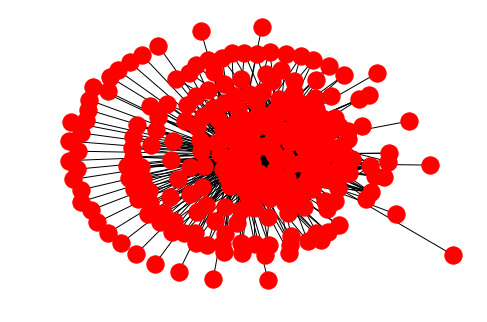

In [43]:
def draw(G, pos, measures, nodes_size, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=nodes_size, cmap=plt.cm.plasma, 
                                   node_color="green")
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.02, linscale=1, base=10, vmin =-1.0, vmax = 2.0))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, edge_color='grey')

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.gcf().set_size_inches(50, 50)
    plt.show()